## Fuzzy Time Series (FTS)
<p> <b>Fuzzy Time Series</b> are <code>non-parametric methods</code> for time series forecasting based on Fuzzy Theory. </p>

<ol>
    <li><b>Data Analysis:</b> Data transformation functions contained at <a href="https://github.com/PYFTS/pyFTS/blob/master/pyFTS/common/Transformations.py"> pyFTS.common.Transformations </a>, like differentiation, Box-Cox, scaling and normalization. 
    </li>
    <li><b>Universe of Discourse Partitioning:</b> This is the most important step. Here, the range of values of the numerical time series Y(t) will be splited in overlapped intervals and for each interval will be created a Fuzzy Set. This step is performed by pyFTS.partition module and its classes (for instance GridPartitioner, EntropyPartitioner, etc). The main parameters are:
    </li>
    <ul>
        <li>
            The number of intervals
        </li>
        <li>
            Which fuzzy membership function (on <a href="https://github.com/PYFTS/pyFTS/blob/master/pyFTS/common/Membership.py"> pyFTS.common.Membership </a>)
        </li>
        <li>
            Partition scheme (<a href="https://github.com/PYFTS/pyFTS/blob/master/pyFTS/partitioners/Grid.py"> GridPartitioner </a>, <a href="https://github.com/PYFTS/pyFTS/blob/master/pyFTS/partitioners/Entropy.py"> EntropyPartitioner </a>, <a href="https://github.com/PYFTS/pyFTS/blob/master/pyFTS/partitioners/FCM.py"> FCMPartitioner </a>, <a href="https://github.com/PYFTS/pyFTS/blob/master/pyFTS/partitioners/CMeans.py"> CMeansPartitioner </a>, <a href="https://github.com/PYFTS/pyFTS/blob/master/pyFTS/partitioners/Huarng.py"> HuarngPartitioner </a>)
        </li>
    </ul>
    <li><b>Data Fuzzyfication:</b> Each data point of the numerical time series $Y(t)$ will be translated to a fuzzy representation (usually one or more fuzzy sets), and then a fuzzy time series $F(t)$ is created. 
    </li>
    <li><b>Generation of Fuzzy Rules:</b> In this step the temporal transition rules are created. These rules depends on the method and their characteristics: 
    </li>
    <ul>
        <li>
            <em>order</em>: the number of time lags used on forecasting
        </li>
        <li>
            <em>weights</em>: the weighted models introduce weights on fuzzy rules for smoothing
        </li>
        <li>
            <em>seasonality</em>: seasonality models depends
        </li>
        <li>
            <em>steps ahead</em>: the number of steps ahed to predict. Almost all standard methods are based on one-step-ahead forecasting
        </li>
        <li>
            <em>forecasting type</em>: Almost all standard methods are point-based, but pyFTS also provides intervalar and probabilistic forecasting methods.
        </li>
    </ul>
    <li>
        <b>Forecasting:</b> The forecasting step takes a sample (with minimum length equal to the model's order) and generate a fuzzy outputs (fuzzy set(s)) for the next time ahead.
    </li>
    <li>
        <b>Defuzzyfication:</b> This step transform the fuzzy forecast into a real number.
    </li>
    <li>
        <b>Data postprocessing:</b> The inverse operations of <b>step 1</b>.
    </li>
</ol>

### Let's Understand More on Fuzzy Time Series
***
<p>The pioneer work on <b>fuzzy time series</b> is Song and Chisson(1993) but here we present the evolution published by Chen(1996). The idea is to divide the <code>Universe of Discourse</code> from time series in <code>intervals/partitions (the fuzzy sets)</code>, and learn how each area <code>behaves (extracting rules through the time series patterns)</code>. The rules of these models tell how the <code>partitions</code> relate with themselves <code>over the time</code>, as values jump from one place to another. In other words: let’s create a <code>linguistic variable</code> to represent the <code>numerical time series</code>, and these areas will be the <code>linguistic terms of our variable</code>. </p>

<p>When we create a <code>linguistic variable</code> to represent the <code>universe of discourse</code>, we create a <code>"vocabulary"</code>, and then the <code>fuzzyfied series</code> is composed of words in that vocabulary. The sequence of these words — the sentences or phrases — are the patterns we need to learned. </p>

### Modelling Parameters in pyFTS:
<h4>Partitioning</h4>
<p><b>Partitioning</b> is composed of three parameters, listed here according to their importance: </p>

<ol>
    <li>
        <b>Number of partitions (or fuzzy sets):</b> This is simply the most influential parameter in the model accuracy. The more fuzzy sets the more precise is the capture of the characteristics of the time series. And there is a trap that lies right here:
    </li>
    <ul>
        <li>Too few fuzzy sets generate <em><font color=Red>underfitting</font></em>, due to signal over simplification; </li>
        <li>Too much fuzzy sets generates <em><font color=Red>overfitting</font></em>, making the model to start learning noise on data; </li>
    </ul>
    <figure>
        <img src="https://miro.medium.com/max/1400/1*gCt6h1_BVS0eQoGdEm5TxA.png" 
             alt="Covariance matrix and function for RBF">
        <figcaption><b>Several numbers of partition for the sine function</b></figcaption>
    </figure>
    <li>
        <b>Partitioning type:</b> There are many types of partitioning, from <code>Grid partitioning (GridPartitioner)</code> where all sets are evenly distributed and have the same format, going through partitioners where sets have distinct sizes — such as <code>entropy-based</code> and <code>cluster-based partitioners</code>.
    </li>
    <li>
        <b>Membership functions:</b> This is a parameter that has little real influence on the accuracy of the model, but depending on the case you may have a good reason for using a <code>Gaussian</code> or <code>trapezoidal function</code> instead of the <code>triangular function</code>, which is the default.
    </li>
</ol>

<h4>Order</h4>
<ol>
    <li>
        <b>Order:</b> The order of the model is the <b>second most important parameter</b> of the FTS, since they are autoregressive models (use lagged values to predict the next ones). The order parameter is the memory size of the model, or how much past information is needed to describe future events.
    </li>
    <li>
        <b>Number of lags (or order):</b> The order is the amount of lags (past values) that are used by the models. This is really very important and depends on the type of time series being modeled. 
    </li>
</ol>

### Methods to be Used in Modelling of Fuzzy Time Series
***
<p>The literature on FTS methods is very diversified, but <b>two features</b> are extremely important: </p>

<ol>
    <li>
        <b>Weighted vs Weightless:</b> The weights increase the accuracy of the model, balancing which sets in the rules of the model are more influential for the forecast. In the example below we can compare the model <code>HOFTS (without weights)</code>, <code>WHOFTS (with weights in consequent of the rules)</code> and <code>PWFTS (with weights in the consequent and the precedent of the rules)</code>:
    </li>
    <figure>
        <img src="https://miro.medium.com/max/1400/1*IgpT9VrHN90Oz8iPK_Gy2g.png"
             alt="Example of model of HOFTS, WHOFTS, PWFTS">
        <figcaption><b>Example of model of HOFTS, WHOFTS, PWFTS</b></figcaption>
    </figure>
    <li>
        <b>Monovariate vs Multivariate:</b> Most of the time we only have time series with one variable — the <code>endogenous variable</code>. Other times this variable is aided by other information (the <code>exogenous variables</code>) from which we can take advantage.
    </li>
</ol>

### Resources
***
<a href="https://github.com/PYFTS/pyFTS"> pyFTS package </a> <br>
<a href="https://github.com/PYFTS/notebooks"> pyFTS code example </a> <br>
<a href="https://zenodo.org/record/2669398#.XsFl-WgzZPZ"> PYFTS/pyFTS: Stable version 1.6 </a> <br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from pyFTS.common import Util as cUtil
from pyFTS.benchmarks import benchmarks as bchmk, Util as bUtil
from pyFTS.partitioners import Grid
from pyFTS.partitioners import Util as pUtil
from pyFTS.data import TAIEX, NASDAQ, SP500
from pyFTS.models import chen
from pyFTS.common import Transformations
from pyFTS.benchmarks import Measures
from pyFTS.benchmarks import ResidualAnalysis as ra

from statsmodels.tsa.stattools import adfuller
from IPython.display import display, Markdown, clear_output, HTML
import ipywidgets as widgets

# # Common data transformations
tdiff = Transformations.Differential(1)
boxcox = Transformations.BoxCox(0)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
dataset_names = ["TAIEX", "SP500","NASDAQ"]

def get_dataset(name):
    if dataset_name == "TAIEX":
        return TAIEX.get_data()
    elif dataset_name == "SP500":
        return SP500.get_data()[11500:16000]
    elif dataset_name == "NASDAQ":
        return NASDAQ.get_data()


train_split = 2000
test_length = 200

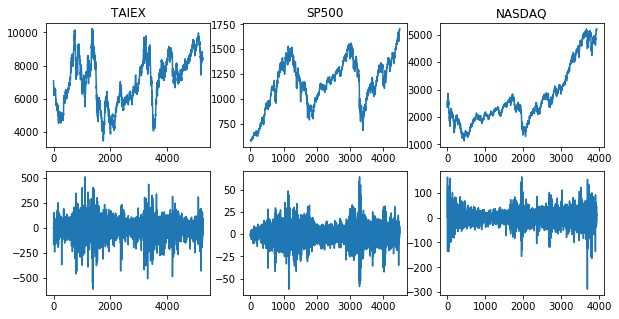

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[10,5])

for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)
    dataset_diff = tdiff.apply(dataset)

    ax[0][count].plot(dataset)
    ax[1][count].plot(dataset_diff)
    ax[0][count].set_title(dataset_name)

In [4]:
rows =[]

for count,dataset_name in enumerate(dataset_names):
    row = [dataset_name]
    dataset = get_dataset(dataset_name)
    result = adfuller(dataset)
    row.extend([result[0],result[1]])
    row.extend([value for key, value in result[4].items()])
    rows.append(row)
    
pd.DataFrame(rows,columns=['Dataset','ADF Statistic','p-value','Cr. Val. 1%','Cr. Val. 5%','Cr. Val. 10%'])

,Dataset,ADF Statistic,p-value,Cr. Val. 1%,Cr. Val. 5%,Cr. Val. 10%
0,TAIEX,-2.656728,0.081830,-3.431601,-2.862093,-2.567064
1,SP500,-1.747171,0.406987,-3.431811,-2.862186,-2.567114
2,NASDAQ,0.476224,0.984132,-3.432022,-2.862279,-2.567163


In [5]:
display(Markdown((r'<h3>Partitioning </h3>')))
display(Markdown((r'<p>The best number of partitions of the Universe of Discourse is an optimization problem. The know more about partitioning schemes please look on the Partitioners notebook. To know more about benchmarking look on the Benchmarks notebook. </p>')))

tag = 'chen_partitioning'
_type = 'point'

for dataset_name in dataset_names:
    dataset = get_dataset(dataset_name)

    bchmk.sliding_window_benchmarks(dataset, 1000, train=0.8, inc=0.2,
                                    methods=[chen.ConventionalFTS],
                                    benchmark_models=False,
                                    transformations=[None],
                                    partitions=np.arange(10,100,2), 
                                    progress=False, type=_type,
                                    file="benchmarks.db", dataset=dataset_name, tag=tag)

    bchmk.sliding_window_benchmarks(dataset, 1000, train=0.8, inc=0.2,
                                    methods=[chen.ConventionalFTS],
                                    benchmark_models=False,
                                    transformations=[tdiff],
                                    partitions=np.arange(3,30,1), 
                                    progress=False, type=_type,
                                    file="benchmarks.db", dataset=dataset_name, tag=tag)

<h3>Partitioning </h3>

<p>The best number of partitions of the Universe of Discourse is an optimization problem. The know more about partitioning schemes please look on the Partitioners notebook. To know more about benchmarking look on the Benchmarks notebook. </p>

EXCEPTION!  CFTS 1 Grid 27 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 27 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 27 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 29 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 29 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 29 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 15 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 15 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 15 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 15 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 15 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 25 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 25 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 29 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 29 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 23 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 23 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 23 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 23 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 15 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 13 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 26 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 27 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 15 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 15 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 7 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 13 Differential(1)
EXCEPTION!  CFTS 1 Grid 14 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 26 Differential(1)
EXCEPTION!  CFTS 1 Grid 27 Differential(1)
EXCEPTION!  CFTS 1 Grid 28 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

EXCEPTION!  CFTS 1 Grid 15 Differential(1)


Traceback (most recent call last):
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 281, in sliding_window_benchmarks
    job = experiment_method(deepcopy(model), deepcopy(partitioner), train, test, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\benchmarks\benchmarks.py", line 367, in run_point
    mfts.fit(train_data, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\common\fts.py", line 384, in fit
    self.train(mdata, **kwargs)
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\models\chen.py", line 53, in train
    tmpdata = self.partitioner.fuzzyfy(data, method='maximum', mode='sets')
  File "C:\Users\kew.jingsheng\AppData\Local\Programs\Python\Python37\lib\site-packages\pyFTS\partitioners\partitioner.py", line 144, in fuzzyfy
    mv = self.fuzzyfy(inst

Text(0.5, 0, 'Number of partitions of the UoD')

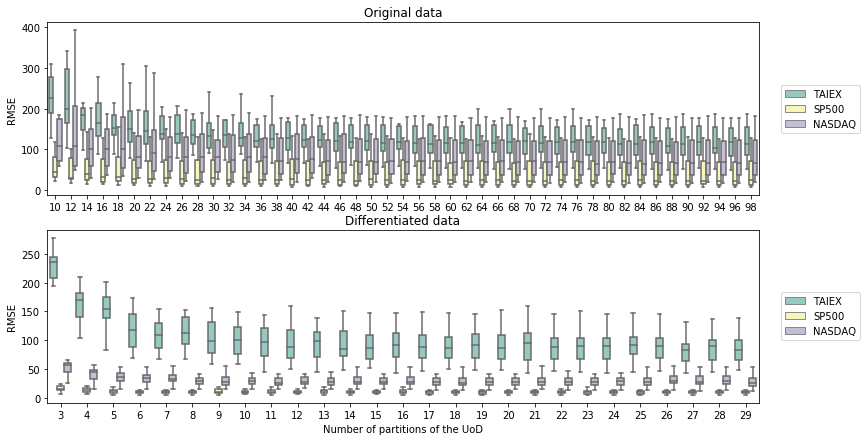

In [6]:
df1 = bUtil.get_dataframe_from_bd("benchmarks.db",
                                  "tag = 'chen_partitioning' and measure = 'rmse' and transformation is null")

df2 = bUtil.get_dataframe_from_bd("benchmarks.db",
                                  "tag = 'chen_partitioning' and measure = 'rmse' and transformation is not null")

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[15,7])

g1 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df1, showfliers=False, ax=ax[0], 
                 palette="Set3")
box = g1.get_position()
g1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
ax[0].set_title("Original data")
ax[0].set_ylabel("RMSE")
ax[0].set_xlabel("")

g2 = sns.boxplot(x='Partitions', y='Value', hue='Dataset', data=df2, showfliers=False, ax=ax[1], 
                 palette="Set3")
box = g2.get_position()
g2.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
g2.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
ax[1].set_title("Differentiated data")
ax[1].set_ylabel("RMSE")
ax[1].set_xlabel("Number of partitions of the UoD")

<h4>Comparing the partitioning schemas </h4>

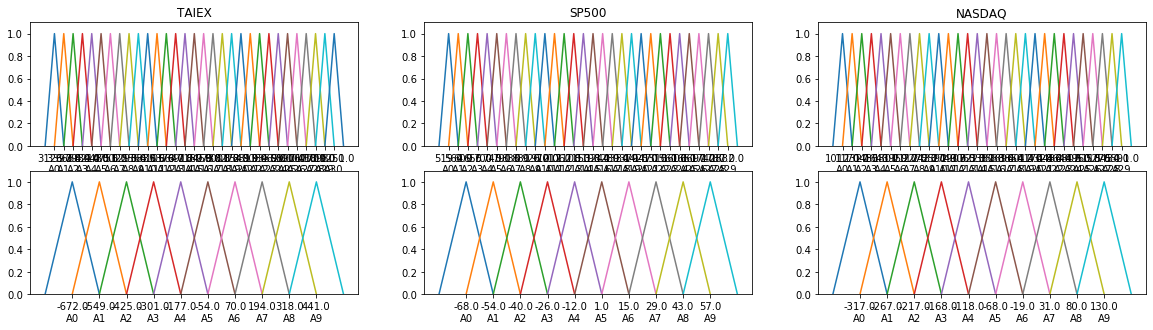

In [7]:
display(Markdown(r'<h4>Comparing the partitioning schemas </h4>'))

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[20,5])

partitioners = {}
partitioners_diff = {}

for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)

    partitioner = Grid.GridPartitioner(data=dataset, npart=30)
    partitioners[dataset_name] = partitioner
    partitioner_diff = Grid.GridPartitioner(data=dataset, npart=10, transformation=tdiff)
    partitioners_diff[dataset_name] = partitioner_diff

    pUtil.plot_sets(dataset, [partitioner.sets], titles=[dataset_name], axis=ax[0][count])
    pUtil.plot_sets(dataset, [partitioner_diff.sets], titles=[''], axis=ax[1][count])

In [8]:
display(Markdown(r'<h4>Fitting Models: With original data </h4>'))

for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)

    model1 = chen.ConventionalFTS(partitioner=partitioners[dataset_name])
    model1.name=dataset_name
    model1.fit(dataset[:train_split], save_model=True, file_path='model1'+dataset_name, order=1)

<h4>Fitting Models: With original data </h4>

In [9]:
display(Markdown(r'<h4>Fitting Models: With transformed data </h4>'))

for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)

    model2 = chen.ConventionalFTS(partitioner=partitioners_diff[dataset_name])
    model2.name=dataset_name
    model2.append_transformation(tdiff)
    model2.fit(dataset[:train_split], save_model=True, file_path='model2'+dataset_name, order=1)

<h4>Fitting Models: With transformed data </h4>

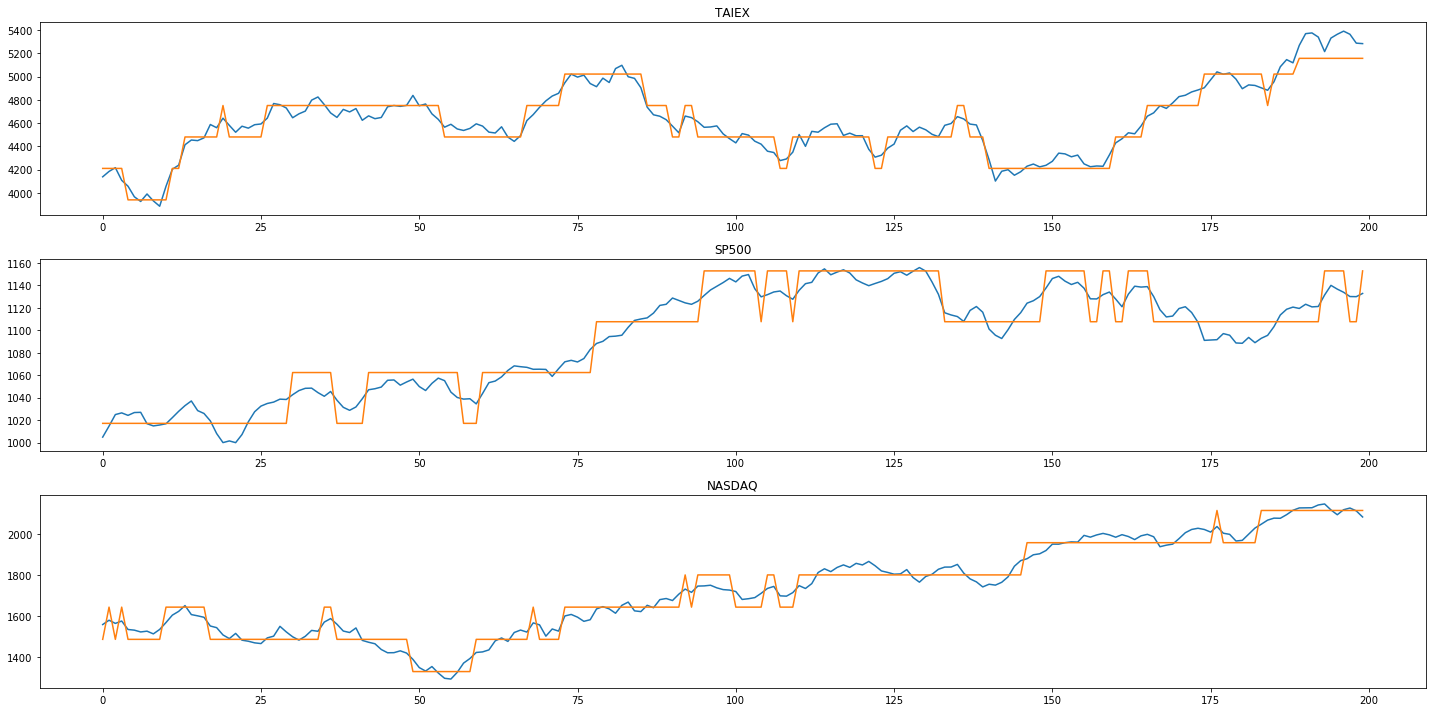

In [10]:
# # Prediction
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=[20,10])

for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)
    
    ax[count].plot(dataset[train_split:train_split+200])

    model1 = cUtil.load_obj('model1'+dataset_name)

    forecasts = model1.predict(dataset[train_split:train_split+200])
    
    ax[count].plot(forecasts)
    
    ax[count].set_title(dataset_name)
    
plt.tight_layout()

In [11]:
rows = []

for count,dataset_name in enumerate(dataset_names):
    row = [dataset_name]
    
    dataset = get_dataset(dataset_name)
    
    test = dataset[train_split:train_split+200]

    model1 = cUtil.load_obj('model1'+dataset_name)
    
    row.extend(Measures.get_point_statistics(test, model1))
    
    rows.append(row)
    
    
pd.DataFrame(rows,columns=["Dataset","RMSE","SMAPE","Theil's U"])

,Dataset,RMSE,SMAPE,Theil's U
0,TAIEX,102.65,1.76,1.56
1,SP500,14.49,1.14,2.60
2,NASDAQ,48.39,2.36,2.02


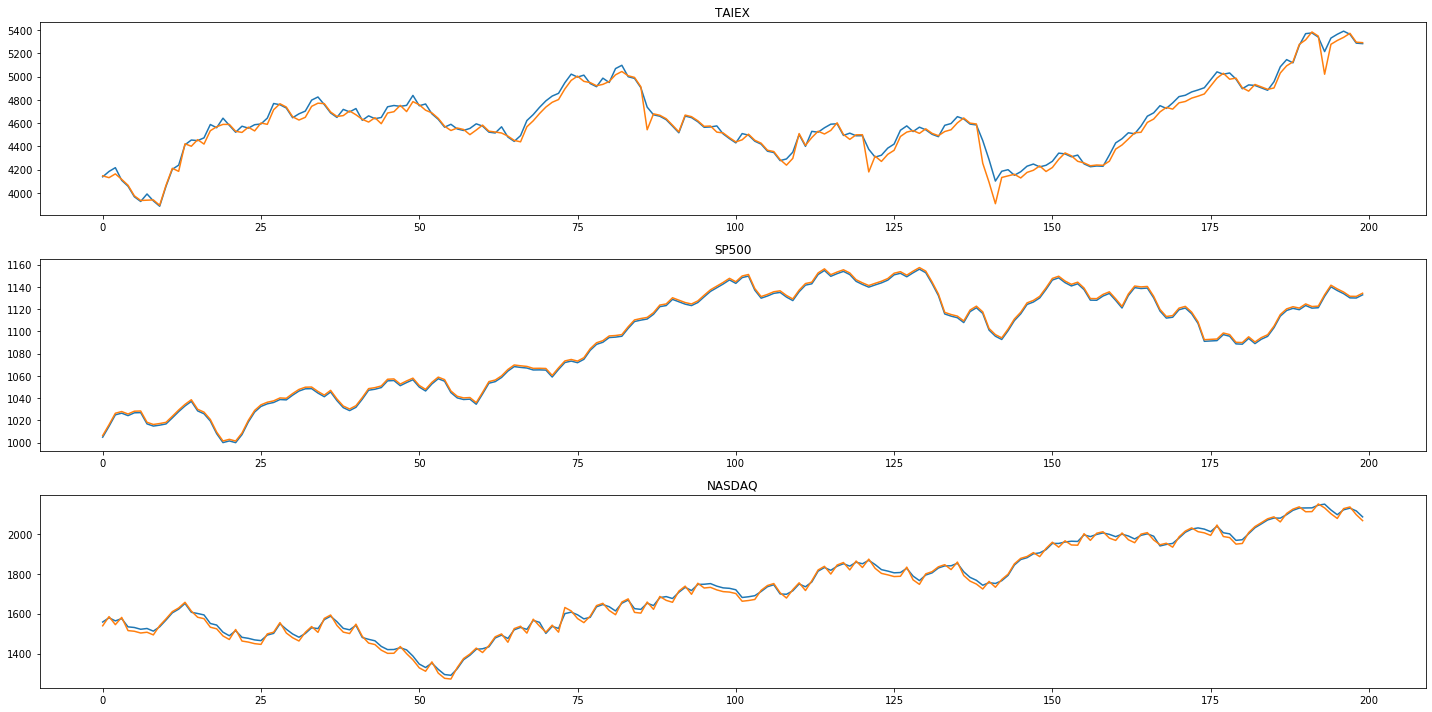

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=[20,10])


for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)
    
    ax[count].plot(dataset[train_split:train_split+200])

    model1 = cUtil.load_obj('model2'+dataset_name)

    forecasts = model1.predict(dataset[train_split:train_split+200])
    
    ax[count].plot(forecasts)
    
    ax[count].set_title(dataset_name)
    
plt.tight_layout()

In [13]:
rows = []

for count,dataset_name in enumerate(dataset_names):
    row = [dataset_name]
    
    dataset = get_dataset(dataset_name)
    
    test = dataset[train_split:train_split+200]

    model1 = cUtil.load_obj('model2'+dataset_name)
    
    row.extend(Measures.get_point_statistics(test, model1))
    
    rows.append(row)
    
    
pd.DataFrame(rows,columns=["Dataset","RMSE","SMAPE","Theil's U"])

,Dataset,RMSE,SMAPE,Theil's U
0,TAIEX,84.15,1.42,1.28
1,SP500,5.58,0.40,1.01
2,NASDAQ,27.98,1.33,1.17
